# <font color="red"> ISAA PROJECT- </font> 18BIT0226

## MODEL -  ADABOOST

***GRADIENT BOOSTING***  
<div style="background-color:rgb(253, 255, 135); "> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.</div>

## <font color="blue"> 1/3 DATASET </font> - LINUX MEMORY

****

### IMPORT THE LIBRARIES

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# DATA
data=pd.read_csv("Train_Test_Linux_dataset/Train_Test_Linux_memory.csv")

In [4]:
data.head()
# A tabular presentation of a small amount of data

,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label,type
0,1556129658,1494,0,0.0,2219.0,390.0,82020.0,0.0,0.0,0.02,Xorg,1,dos
1,1556129738,1641,0,0.0,12.0,9480.0,3496.0,0.0,0.0,0.00,haveged,1,dos
2,1556129778,6604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,kworker/0:1,1,dos
3,1556129788,51017,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,<kworker/u256>,1,dos
4,1556129798,2766,0,0.0,10.0,1.3,68724.0,0.0,0.0,0.02,compiz,1,dos


In [5]:
# Size of the dataset (rows,colums)
data.shape

(140112, 13)

In [6]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140112 entries, 0 to 140111
Data columns (total 13 columns):
ts        140112 non-null int64
PID       140112 non-null int64
MINFLT    140112 non-null int64
MAJFLT    140112 non-null float64
VSTEXT    140112 non-null float64
VSIZE     140112 non-null float64
RSIZE     140112 non-null float64
VGROW     140112 non-null float64
RGROW     140112 non-null float64
MEM       140112 non-null float64
CMD       140112 non-null object
label     140112 non-null int64
type      140112 non-null object
dtypes: float64(7), int64(4), object(2)
memory usage: 13.9+ MB


There are two object data types and we will need to encode them 

In [7]:
#numerical summary of the numerical(int , float colums)
data.describe()

,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,label
count,1.401120e+05,140112.000000,1.401120e+05,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000
mean,1.554978e+09,3266.943538,7.734218e+02,6.203922,578.781712,8547.217410,10193.116403,401.780812,142.947496,0.004469,0.286285
std,8.142325e+05,2119.039113,2.233345e+04,462.086591,1373.721981,11445.859713,17039.081046,4378.613411,1543.199420,0.011588,0.452026
min,1.554219e+09,1007.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.554394e+09,2533.000000,0.000000e+00,0.000000,47.000000,114.700000,1588.000000,0.000000,0.000000,0.000000,0.000000
50%,1.554569e+09,3155.000000,3.000000e+00,0.000000,148.000000,710.100000,2604.000000,0.000000,0.000000,0.000000,0.000000
75%,1.556208e+09,3895.000000,1.960000e+03,0.000000,589.000000,17948.000000,11064.000000,0.000000,0.000000,0.000000,1.000000
max,1.556549e+09,53096.000000,8.050000e+06,107776.000000,50652.000000,78328.000000,99496.000000,99268.000000,98920.000000,0.160000,1.000000


In [8]:
data.isnull().sum()

ts        0
PID       0
MINFLT    0
MAJFLT    0
VSTEXT    0
VSIZE     0
RSIZE     0
VGROW     0
RGROW     0
MEM       0
CMD       0
label     0
type      0
dtype: int64

<div style="background-color:rgb(255, 233, 173)"> There are no null values in the dataset </div>

In [9]:
data['CMD'].value_counts()

atop              37995
vmtoolsd           8028
compiz             5279
ostinato           5254
irqbalance         5241
                  ...  
<squirrelmail>        1
<apt-get>             1
<gedit>               1
dumpcap               1
<apt-ey>              1
Name: CMD, Length: 342, dtype: int64

#### <font color="blue"> Tried to see the unique values of the "CMD" column so that could go for better encoding option but found out that it has many values . So we need to go for Label Encoding.

In [10]:
data['label'].value_counts()

0    100000
1     40112
Name: label, dtype: int64

In [11]:
data['type'].value_counts()

normal       100000
ddos          10000
password      10000
injection     10000
dos           10000
mitm            112
Name: type, dtype: int64

### EDA

['dos' 'normal' 'ddos' 'injection' 'mitm' 'password']
normal       100000
ddos          10000
password      10000
injection     10000
dos           10000
mitm            112
Name: type, dtype: int64


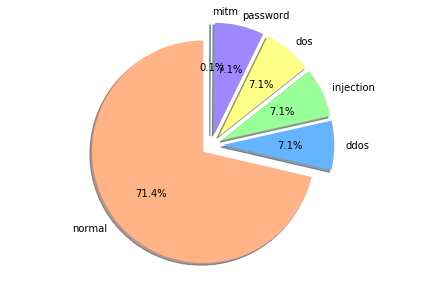

In [12]:
print(data['type'].unique())
print(data['type'].value_counts())
labels=['normal','ddos','injection','dos','password','mitm']
sizes = [data['type'].value_counts()];
explode = (0.1, 0.1, 0.1,0.1,0.1,0.1)
colors = ['#ffb387','#66b3ff','#99ff99','#fdff87','#9f87ff','#87fffd']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

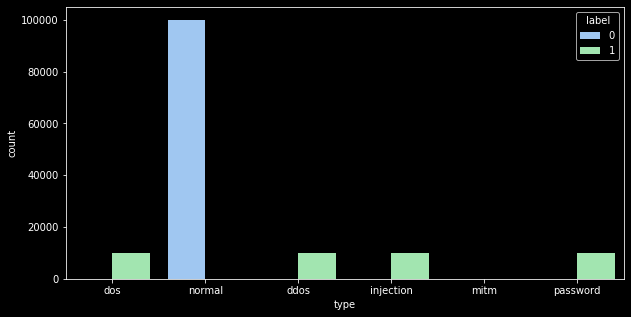

In [13]:
plt.style.use('dark_background')
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
sns.countplot(x="type",hue = "label", data= data)

### ENCODING THE CATEGORICAL FEATURES

In [14]:
# Label Encoding
#This gives a seperate unique numerical value to each unique value in the object data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# We only have 2 columns whose data type is not float or int
# CMD and type
data["CMD_Enc"]=LE.fit_transform(data.CMD)
data["type_Enc"]=LE.fit_transform(data.type)
data.drop(['CMD','type'],axis=1,inplace=True)

In [15]:
data.head()

,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,label,CMD_Enc,type_Enc
0,1556129658,1494,0,0.0,2219.0,390.0,82020.0,0.0,0.0,0.02,1,139,1
1,1556129738,1641,0,0.0,12.0,9480.0,3496.0,0.0,0.0,0.00,1,225,1
2,1556129778,6604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,253,1
3,1556129788,51017,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,71,1
4,1556129798,2766,0,0.0,10.0,1.3,68724.0,0.0,0.0,0.02,1,163,1


In [16]:
data["type_Enc"].value_counts()

4    100000
5     10000
2     10000
1     10000
0     10000
3       112
Name: type_Enc, dtype: int64

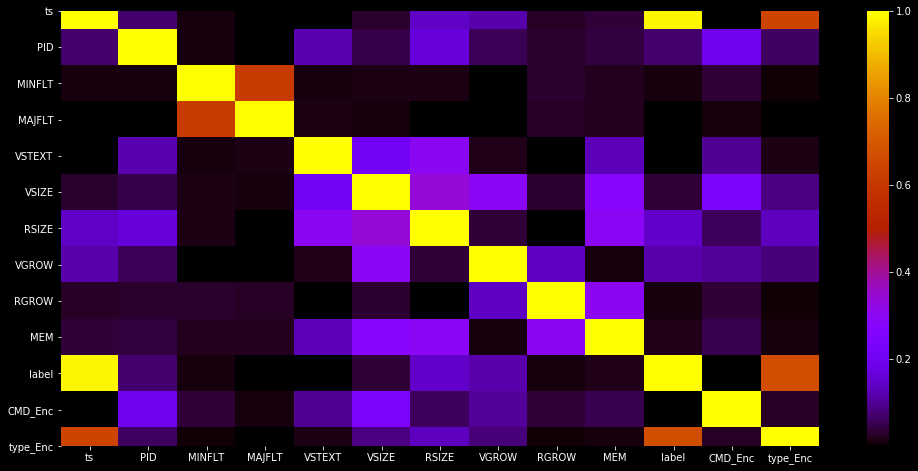

In [17]:
plt.figure(figsize=(17,8))
sns.heatmap(data.corr().apply(abs),cmap='gnuplot')

In [18]:
y=data['type_Enc']

In [19]:
x=data.drop(['type_Enc'], axis=1)

## SCALING 

In [20]:
# STANDARD SCALER

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
data_name=data.iloc[:,:-1]
cols = data_name.columns
sc_data = scaler.fit_transform(x)
# turn the result back to a dataframe
data = pd.DataFrame(sc_data, columns = cols)

In [21]:
# MIN MAX SCALER

# mm_scaler = sklearn.preprocessing.MinMaxScaler()
# data_name=data.iloc[:,:-1]
# cols = data_name.columns
# sc_data = mm_scaler.fit_transform(x)
# # turn the result back to a dataframe
# data = pd.DataFrame(sc_data, columns = cols)

In [22]:
data

,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,label,CMD_Enc
0,1.413833,-0.836676,-0.034631,-0.013426,1.194000,-0.712681,4.215435,-0.091760,-0.092631,1.340342,1.57893,-1.057100
1,1.413932,-0.767305,-0.034631,-0.013426,-0.412590,0.081495,-0.393046,-0.091760,-0.092631,-0.385655,1.57893,0.132321
2,1.413981,1.574803,-0.034631,-0.013426,-0.421325,-0.746755,-0.598222,-0.091760,-0.092631,-0.385655,1.57893,0.519574
3,1.413993,22.533905,-0.034631,-0.013426,-0.421325,-0.746755,-0.598222,-0.091760,-0.092631,-0.385655,1.57893,-1.997572
4,1.414005,-0.236402,-0.034631,-0.013426,-0.414046,-0.746641,3.435109,-0.091760,-0.092631,1.340342,1.57893,-0.725168
...,...,...,...,...,...,...,...,...,...,...,...,...
140107,-0.886363,0.521963,0.058324,-0.013426,-0.313588,0.795119,-0.456899,-0.091760,-0.092631,-0.385655,-0.63334,-0.863473
140108,-0.886357,-0.668203,-0.034631,-0.013426,-0.395119,-0.732793,-0.480844,-0.091760,-0.092631,-0.385655,-0.63334,1.556860
140109,-0.886351,-0.894722,-0.034407,-0.013426,-0.395119,0.939101,-0.560661,-0.091760,-0.092631,-0.385655,-0.63334,0.422761
140110,-0.886345,-0.754563,-0.034631,-0.013426,-0.412590,0.081495,-0.581085,-0.091760,-0.092631,-0.385655,-0.63334,0.132321


### SAMPLING

In [23]:
y.value_counts()

4    100000
5     10000
2     10000
1     10000
0     10000
3       112
Name: type_Enc, dtype: int64

In [24]:
import imblearn
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

s_strategy = {0: 10000, 1: 10000, 2:10000, 3:10000, 4:100000, 5:10000}

# ru = RandomUnderSampler()
ro=RandomOverSampler(sampling_strategy=s_strategy,random_state=1)
# Xres, yres = ru.fit_sample(data,y)

Xro,yro=ro.fit_resample(data,y)

# oversample = RandomOverSampler(sampling_strategy=0.75) #75% oversampling
# X_res, y_res= oversample.fit_resample(X_train,y_train)

In [25]:
yro.value_counts()

4    100000
5     10000
3     10000
2     10000
1     10000
0     10000
Name: type_Enc, dtype: int64

In [26]:
from imblearn.under_sampling import RandomUnderSampler

s_strategy = {0: 10000, 1: 10000, 2:10000,3:10000,4:10000,5:10000}
ru = RandomUnderSampler(sampling_strategy=s_strategy,random_state=1)


Xres1,yres1=ru.fit_resample(Xro,yro)

In [27]:
yres1.value_counts()

5    10000
4    10000
3    10000
2    10000
1    10000
0    10000
Name: type_Enc, dtype: int64

In [28]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedStratifiedKFold,cross_val_score
from numpy import mean

### TRAIN TEST SPLIT

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xres1,yres1, test_size=0.25, random_state=42, stratify=yres1)

### <div style="background-color: rgb(135, 209, 255);">  MODEL -ADABOOST </div>

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)

In [32]:
import time 
time_start=time.clock()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

time_elapsed=(time.clock()-time_start)
time_elapsed

0.5


2.561669199996686

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score

In [32]:
pred1=model.predict(X_test)

In [33]:
# The major diagonal represents the true values
confusion_matrix(y_test,pred1)

array([[   0,    0,    0,    0,    0, 2500],
       [   0,    0,    0,    0,    0, 2500],
       [   0,    0,    0,    0,    0, 2500],
       [   0,    0,    0, 2500,    0,    0],
       [   0,    0,    0,    0, 2500,    0],
       [   0,    0,    0,    0,    0, 2500]], dtype=int64)

In [34]:
def get_classification_report(y_test, pred1): 
    report = metrics.classification_report(y_test, pred1, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['support'], ascending=False)
    
    return df_classification_report

C_R = get_classification_report(y_test, pred1)
print(C_R)

              precision  recall  f1-score  support
macro avg         0.375     0.5       0.4  15000.0
weighted avg      0.375     0.5       0.4  15000.0
0                 0.000     0.0       0.0   2500.0
1                 0.000     0.0       0.0   2500.0
2                 0.000     0.0       0.0   2500.0
3                 1.000     1.0       1.0   2500.0
4                 1.000     1.0       1.0   2500.0
5                 0.250     1.0       0.4   2500.0
accuracy          0.500     0.5       0.5      0.5


### K FOLD CROSS VALIDATION

- ### KFold
- ### Stratified KFold
- ### Repeated Stratified Kfold

In [35]:
model= AdaBoostClassifier(random_state=42)

def evaluate_model(model):
    
    KF=KFold(n_splits=10)
    score1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=KF)
    
    SKF= StratifiedKFold(n_splits=10)
    score2 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=SKF)
    
    RSKF= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)
    score3 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=RSKF)
    
    list_scores=[mean(score1),mean(score2),mean(score3)]
    
    return list_scores

scores = evaluate_model(model)

In [36]:
names=["KFold","Stratified KFold","Repeated Stratified KFold"]
print("KFOLD CROSS VALIDATION SCORES")
print("------------------------------------")

for (i,j) in zip(scores,names):
    print(j,"-",round(i*100,2),'%')
   
    

KFOLD CROSS VALIDATION SCORES
------------------------------------
KFold - 49.4 %
Stratified KFold - 50.0 %
Repeated Stratified KFold - 50.0 %


## HYPER PARAMETRIC TUNING

In [67]:
params={'n_estimators': [200,300],
           'learning_rate': [0.01,0.015]}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid = GridSearchCV(AdaBoostClassifier(),params,refit=True,verbose=3)


In [70]:
# X_train.iloc[np.random.randint(low=0, high=450000, size=int(0.15 * 450000))]
# X_train1=X_train.sample(frac=0.35)
# y_train1=y_train.sample(frac=0.35)

In [71]:
X_train.shape
y_train.shape

(45000,)

In [72]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=200, score=0.786, total=   6.0s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=0.751, total=   6.1s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=0.795, total=   5.9s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.753, total=   5.9s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.751, total=   5.9s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.763, total=   8.7s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.521, total=   8.9s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.663, total=   8.8s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.528, total=   8.9s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.015],
                         'n_estimators': [200, 300]},
             verbose=3)

In [73]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [74]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [75]:
grid_predictions = grid.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,grid_predictions))

[[1301 1131   68    0    0    0]
 [   8 2381  111    0    0    0]
 [   0 1730  770    0    0    0]
 [   0    0    0 2500    0    0]
 [   0    0    0    0 2500    0]
 [ 157    0    0    0    0 2343]]


In [78]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.52      0.66      2500
           1       0.45      0.95      0.62      2500
           2       0.81      0.31      0.45      2500
           3       1.00      1.00      1.00      2500
           4       1.00      1.00      1.00      2500
           5       1.00      0.94      0.97      2500

    accuracy                           0.79     15000
   macro avg       0.86      0.79      0.78     15000
weighted avg       0.86      0.79      0.78     15000

